<h1>PROJECT CASE SCENARIO</h1>
You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following:

- Is there a significant difference in the median value of houses bounded by the Charles river or not?
- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

<h3>Load The Dataset

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url, index_col = 0)

In [4]:
boston_df.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4


The following describes the dataset variables:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

**<h3>Generate Descriptive Statistics and Visualizations</h3>**

<h5>For the "Median value of owner-occupied homes" provide a boxplot

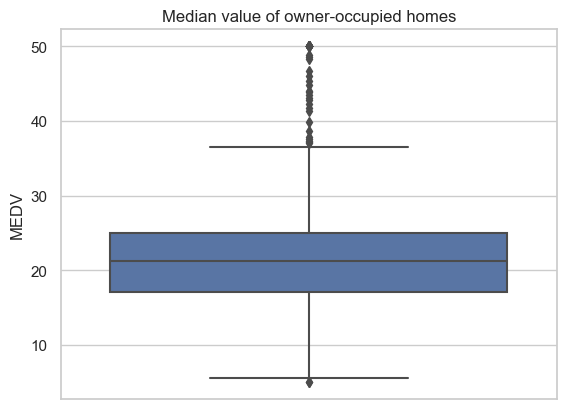

In [5]:
sns.set(style="whitegrid")
ax = sns.boxplot(y='MEDV', data = boston_df).set(title = "Median value of owner-occupied homes")

<h5>Provide a  bar plot for the Charles river variable

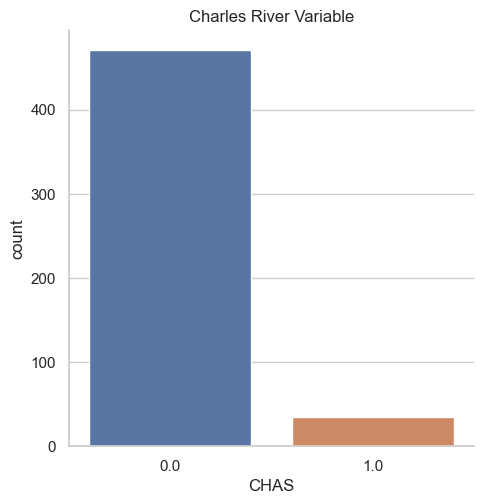

In [6]:
sns.catplot(x = 'CHAS', kind= 'count', data=boston_df).set(title = 'Charles River Variable')

<h5>Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [7]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] <= 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] > 70), 'age_group'] = '70 years and older'

[Text(0.5, 1.0, 'MEDV vs AGE variable')]

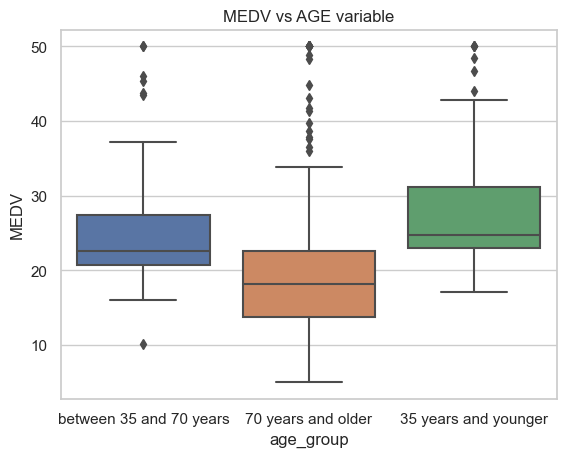

In [8]:
sns.boxplot(x = 'age_group', y= 'MEDV', data = boston_df).set(title = 'MEDV vs AGE variable')

<h5>Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

[Text(0.5, 1.0, 'itric Oxide Concentration and the Proportion of Non-retail Business Acres per Town Relationship')]

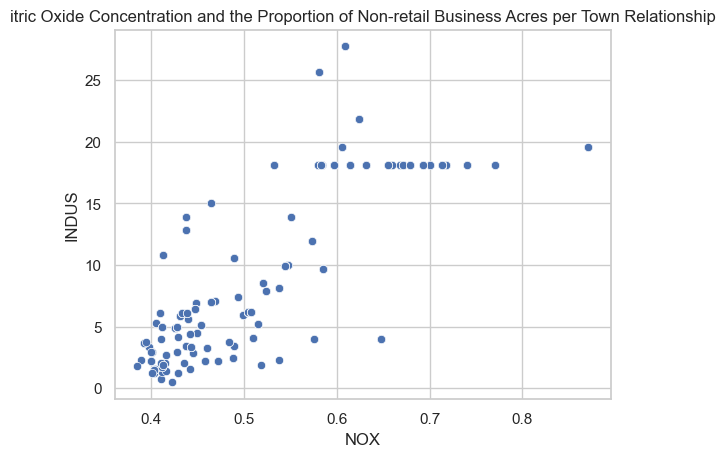

In [18]:
sns.scatterplot(x='NOX', y='INDUS', data = boston_df).set(title = 'itric Oxide Concentration and the Proportion of Non-retail Business Acres per Town Relationship')

<h5>Create a histogram for the pupil to teacher ratio variable

C:\Users\Nathaniel Win\AppData\Local\Temp\ipykernel_1476\3223250697.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_df['PTRATIO'], kde = True).set(title = 'Pupil to Teacher Ratio')


[Text(0.5, 1.0, 'Pupil to Teacher Ratio')]

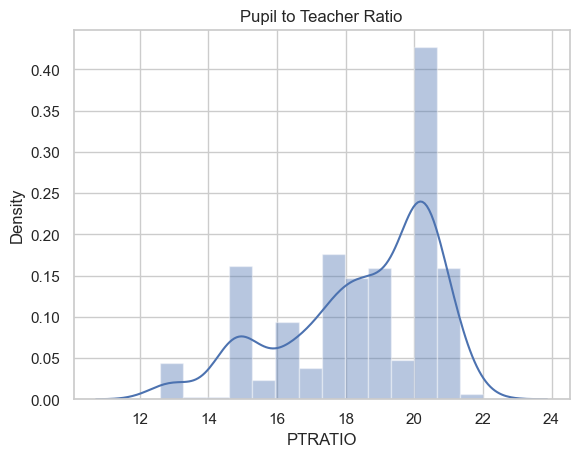

In [17]:
sns.distplot(boston_df['PTRATIO'], kde = True).set(title = 'Pupil to Teacher Ratio')

**<h3>Use the appropriate tests to answer the questions provided.</h3>**
Use α = 0.05

For each of the following questions:

**<h5>Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

Hypothesis:
- Null Hypothesis: There is no difference in median value of houses bounded by the Charles river
- Alternative Hypothesis: There is a significant difference in median value of houses bounded by the Charles river

In [52]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                boston_df[boston_df['CHAS'] == 1]['MEDV'], center = 'mean')

# Since pvalue less than 0.05, variance not equal

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [53]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

Conclusion:
p-value is less than 0.05, so we reject the null hypothesis as there is an evidence that there is a significant difference in median value of houses bounded by the Charles river

**<h5>Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

Hypothesis:
- Null Hypothesis: Median values of houses for each proportion off owner occupied units built prior to 1940 are equal
- Alternative Hypothesis: There is a difference in Median values of houses for each proportion off owner occupied units built prior to 1940

In [55]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [56]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic, p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Conclusion:

p-value is less than 0.05, so we reject the null hypothesis as there is evidence that the median values of houses for each proportion of owner occupied units built prior to 1940 are equal 

**<h5>Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

Hypothesis:
- Null Hypothesis: Nitric oxide concentrations are not correlated with proportion of non-retail business acres per town
- Alternative Hypothesis: Nitric oxide concentrations are correlated with proportion of non-retail business acres per town

In [57]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.913361061233745e-98)

Conclusion:
p-value is less than 0.05, so we reject the null hypothesis as there is evidence Nitric oxide concentrations are correlated with proportion of non-retail business acres per town

**<h5>What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

Hypothesis:
- Null Hypothesis: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
- Alternative Hypothesis: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

In [62]:
X = boston_df['DIS'] 
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.21e-08
Time:                        15:11:16   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion:

p-value is less than 0.05, so we reject the null hypothesis as there is evidence that an additional weighted distance to the five Boston employment centres impacted the median value of owner occupied homes

## Authors


[Nathaniel Win Lincoln](https://www.linkedin.com/in/nathanielwin/) is an Aspiring Data Scientist who holds a degree in Biomedical Engineering from Sepuluh Nopember Institute of Technology, Indonesia. Experienced in biological data processing and prediction.